# Ensemble Learning

## Initial Imports

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
%matplotlib inline
import pydotplus
from IPython.display import Image

In [41]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced


## Read the CSV and Perform Basic Data Cleaning

In [42]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [43]:
df[['Month', 'Year']] = df['issue_d'].str.split('-', expand = True)
df.head()
del df['issue_d']
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,Month,Year
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,low_risk,n,27.24,0.0,...,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N,Mar,2019
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,low_risk,n,20.23,0.0,...,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N,Mar,2019
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,low_risk,n,24.26,0.0,...,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N,Mar,2019
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,low_risk,n,31.44,0.0,...,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N,Mar,2019
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,low_risk,n,18.76,0.0,...,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N,Mar,2019


In [44]:
df[['Month_Next', 'Year_Next']] = df['next_pymnt_d'].str.split('-', expand = True)
del df['next_pymnt_d']
df.head()



,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,Month,Year,Month_Next,Year_Next
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,low_risk,n,27.24,0.0,...,65687.0,38199.0,2000.0,61987.0,N,N,Mar,2019,May,2019
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,low_risk,n,20.23,0.0,...,271427.0,60641.0,41200.0,49197.0,N,N,Mar,2019,May,2019
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,low_risk,n,24.26,0.0,...,60644.0,45684.0,7500.0,43144.0,N,N,Mar,2019,May,2019
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,low_risk,n,31.44,0.0,...,99506.0,68784.0,19700.0,76506.0,N,N,Mar,2019,May,2019
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,low_risk,n,18.76,0.0,...,219750.0,25919.0,27600.0,20000.0,N,N,Mar,2019,May,2019


# Encoding Categorical Labels - additional to the homework starter code

In [45]:
#Encode catgorical labels 
lbl = LabelEncoder()
lbl.fit(df["Month"])
LabelEncoder()


LabelEncoder()

In [46]:
list (lbl.classes_)

['Feb', 'Jan', 'Mar']

In [47]:
months_num = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "Aug": 8,
    "Sept": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12,
}

df["Month_num"] = df["Month"].apply(lambda x: months_num[x])

del df['Month']

df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,Year,Month_Next,Year_Next,Month_num
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,low_risk,n,27.24,0.0,...,65687.0,38199.0,2000.0,61987.0,N,N,2019,May,2019,3
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,low_risk,n,20.23,0.0,...,271427.0,60641.0,41200.0,49197.0,N,N,2019,May,2019,3
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,low_risk,n,24.26,0.0,...,60644.0,45684.0,7500.0,43144.0,N,N,2019,May,2019,3
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,low_risk,n,31.44,0.0,...,99506.0,68784.0,19700.0,76506.0,N,N,2019,May,2019,3
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,low_risk,n,18.76,0.0,...,219750.0,25919.0,27600.0,20000.0,N,N,2019,May,2019,3


In [48]:
#Encode catgorical labels 
lbl2 = LabelEncoder()
lbl2.fit(df["Month_Next"])
LabelEncoder()

LabelEncoder()

In [49]:
months_num2 = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "Aug": 8,
    "Sept": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12,
}


#lbl2.fit(df["Month_Next"])

df["Month_Next"] = df["Month_Next"].apply(lambda x: months_num[x])


df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,Year,Month_Next,Year_Next,Month_num
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,low_risk,n,27.24,0.0,...,65687.0,38199.0,2000.0,61987.0,N,N,2019,5,2019,3
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,low_risk,n,20.23,0.0,...,271427.0,60641.0,41200.0,49197.0,N,N,2019,5,2019,3
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,low_risk,n,24.26,0.0,...,60644.0,45684.0,7500.0,43144.0,N,N,2019,5,2019,3
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,low_risk,n,31.44,0.0,...,99506.0,68784.0,19700.0,76506.0,N,N,2019,5,2019,3
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,low_risk,n,18.76,0.0,...,219750.0,25919.0,27600.0,20000.0,N,N,2019,5,2019,3


In [50]:
# home_ownership

lbl.fit(df["home_ownership"])
df["home_ownership"] = lbl.transform(df["home_ownership"])

# verification_status

lbl.fit(df["verification_status"])
df["verification_status"] = lbl.transform(df["verification_status"])

# "loan_status"

lbl.fit(df["loan_status"])
df["loan_status"] = lbl.transform(df["loan_status"])

# pymnt_plan

#df = pd.get_dummies(df, columns=["pymnt_plan"])

lbl.fit(df["pymnt_plan"])
df["pymnt_plan"] = lbl.transform(df["pymnt_plan"])

#hardship_flag

lbl.fit(df["hardship_flag"])
df["hardship_flag"] = lbl.transform(df["hardship_flag"])

# debt_settlement_flag

lbl.fit(df["debt_settlement_flag"])
df["debt_settlement_flag"] = lbl.transform(df["debt_settlement_flag"])

# initial list status

lbl.fit(df["initial_list_status"])
df["initial_list_status"] = lbl.transform(df["initial_list_status"])

# initial list status

lbl.fit(df["initial_list_status"])
df["initial_list_status"] = lbl.transform(df["initial_list_status"])

# aplication type

lbl.fit(df["application_type"])
df["application_type"] = lbl.transform(df["application_type"])


df.head()


,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,Year,Month_Next,Year_Next,Month_num
0,10500.0,0.1719,375.35,3,66000.0,1,1,0,27.24,0.0,...,65687.0,38199.0,2000.0,61987.0,0,0,2019,5,2019,3
1,25000.0,0.2000,929.09,1,105000.0,2,1,0,20.23,0.0,...,271427.0,60641.0,41200.0,49197.0,0,0,2019,5,2019,3
2,20000.0,0.2000,529.88,1,56000.0,2,1,0,24.26,0.0,...,60644.0,45684.0,7500.0,43144.0,0,0,2019,5,2019,3
3,10000.0,0.1640,353.55,3,92000.0,2,1,0,31.44,0.0,...,99506.0,68784.0,19700.0,76506.0,0,0,2019,5,2019,3
4,22000.0,0.1474,520.39,1,52000.0,0,1,0,18.76,0.0,...,219750.0,25919.0,27600.0,20000.0,0,0,2019,5,2019,3


## Split the Data into Training and Testing

In [51]:
# Create our features
X = df.drop(columns='loan_status')
X= pd.get_dummies(X)

# Create our target
y = df['loan_status']


In [52]:
X.describe()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,Month_Next,Month_num,Year_2019,Year_Next_2019
count,68817.000000,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,...,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04,68817.0,68817.0,68817.000000,68817.000000,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,1.812779,8.821371e+04,0.669994,0.0,21.778153,0.217766,0.497697,...,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04,0.0,0.0,4.616839,1.726172,1.0,1.0
std,10277.348590,0.048130,288.062432,0.941313,1.155800e+05,0.719105,0.0,20.199244,0.718367,0.758122,...,1.928088e+05,5.738798e+04,26795.394232,5.095845e+04,0.0,0.0,0.486161,0.743862,0.0,0.0
min,1000.000000,0.060000,30.890000,0.000000,4.000000e+01,0.000000,0.0,0.000000,0.000000,0.000000,...,3.600000e+03,2.350000e+02,100.000000,1.270000e+02,0.0,0.0,4.000000,1.000000,1.0,1.0
25%,9000.000000,0.088100,265.730000,1.000000,5.000000e+04,0.000000,0.0,13.890000,0.000000,0.000000,...,6.697700e+04,2.650300e+04,11600.000000,2.288000e+04,0.0,0.0,4.000000,1.000000,1.0,1.0
50%,15000.000000,0.118000,404.560000,1.000000,7.300000e+04,1.000000,0.0,19.760000,0.000000,0.000000,...,1.467100e+05,4.535700e+04,22100.000000,4.200000e+04,0.0,0.0,5.000000,2.000000,1.0,1.0
75%,24000.000000,0.155700,648.100000,3.000000,1.040000e+05,1.000000,0.0,26.660000,0.000000,1.000000,...,3.036400e+05,7.657000e+04,39300.000000,7.249900e+04,0.0,0.0,5.000000,2.000000,1.0,1.0
max,40000.000000,0.308400,1676.230000,3.000000,8.797500e+06,2.000000,0.0,999.000000,18.000000,5.000000,...,3.292782e+06,1.295455e+06,509400.000000,1.426964e+06,0.0,0.0,5.000000,3.000000,1.0,1.0


In [53]:
# Check the balance of our target values
# YOUR CODE HERE
y

0        1
1        1
2        1
3        1
4        1
        ..
68812    1
68813    1
68814    1
68815    1
68816    1
Name: loan_status, Length: 68817, dtype: int32

In [54]:
# Split the X and y into X_train, X_test, y_train, y_test
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [55]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [56]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [57]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

In [58]:
!pip install -U scikit-learn

In [59]:
!pip install -U impbalanced-learn

ERROR: Could not find a version that satisfies the requirement impbalanced-learn (from versions: none)
ERROR: No matching distribution found for impbalanced-learn



### Balanced Random Forest Classifier

In [60]:
# Resample the training data with the BalancedRandomForestClassifier

brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf_model=brf_model.fit(X_train_scaled, y_train) 

y_pred = brf_model.predict(X_test_scaled)

In [61]:
#Calculated the balanced accuracy score
aac_score = accuracy_score(y_test, y_pred)  
aac_score

0.8777099680325486

In [62]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[   64,    37],
       [ 2067, 15037]], dtype=int64)

In [63]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.03      0.63      0.88      0.06      0.75      0.54       101
          1       1.00      0.88      0.63      0.93      0.75      0.57     17104

avg / total       0.99      0.88      0.64      0.93      0.75      0.57     17205



In [64]:
# List the features sorted in descending order by feature importance
importances = brf_model.feature_importances_

In [65]:
# We can sort the features by their importance
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)


[(0.07506145593248177, 'total_rec_prncp'),
 (0.06799295090142603, 'last_pymnt_amnt'),
 (0.0579121574812736, 'total_pymnt'),
 (0.0555306184290369, 'total_rec_int'),
 (0.04550622354474276, 'total_pymnt_inv'),
 (0.0329371791810003, 'Month_num'),
 (0.027147316918471942, 'int_rate'),
 (0.01938182185059139, 'installment'),
 (0.01861592137574549, 'total_bal_ex_mort'),
 (0.01732119851720788, 'dti'),
 (0.017269792001568973, 'mths_since_recent_inq'),
 (0.01712344782800792, 'max_bal_bc'),
 (0.016251417344851707, 'out_prncp'),
 (0.016213156560629712, 'total_bal_il'),
 (0.01608346579831385, 'mo_sin_old_rev_tl_op'),
 (0.015202495656033004, 'bc_open_to_buy'),
 (0.015093873262961965, 'out_prncp_inv'),
 (0.015074986962754633, 'mo_sin_old_il_acct'),
 (0.014534634336816125, 'all_util'),
 (0.013970006639156906, 'il_util'),
 (0.013852969683252774, 'mths_since_rcnt_il'),
 (0.013773328588213587, 'total_acc'),
 (0.013769696085787219, 'tot_hi_cred_lim'),
 (0.01366558424105442, 'total_bc_limit'),
 (0.0136284706

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

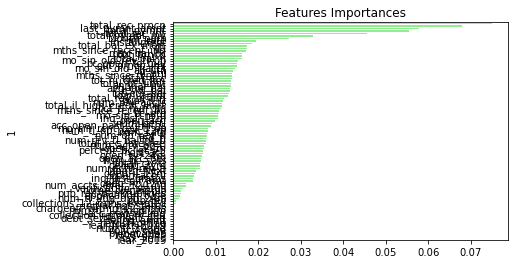

In [66]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(brf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [67]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


### Easy Ensemble Classifier

In [68]:
# Train the Classifier
from imblearn.ensemble import EasyEnsembleClassifier

EEC = EasyEnsembleClassifier(random_state=0)
EEC.fit(X_train_scaled, y_train) 

y_pred = EEC.predict(X_test_scaled)

# rom imblearn.ensemble import EasyEnsembleClassifier
# eec = EasyEnsembleClassifier(random_state=0)
# eec.fit(X_train, y_train) 
# EasyEnsembleClassifier(...)
# y_pred = eec.predict(X_test)
# balanced_accuracy_score(y_test, y_pred)  


In [69]:
# Calculated the balanced accuracy score
EEC_score = accuracy_score(y_test, y_pred) 
EEC_score

0.91572217378669

In [32]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   90,    11],
       [ 1439, 15665]], dtype=int64)

In [33]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.06      0.89      0.92      0.11      0.90      0.81       101
          1       1.00      0.92      0.89      0.96      0.90      0.82     17104

avg / total       0.99      0.92      0.89      0.95      0.90      0.82     17205



### Final Questions

1. Which model had the best balanced accuracy score?
    Easy Ensambe Classifier produced higher accuracy score of 0.915 vs. Balanced Random Forest of 0.87. 
    
2. Which model had the best recall score?

   Easy Ensamble Calssifier has significantly outperformed the Balanced Random Forest Classifer with a higher recall score 0.89 vs. 0.63. 
   With an ability to id more actual positives and higher geo mean, the model is more suitable / reliable to predict loan risk. Overall EEC shows to be stronger model based on F1 score.
   
3. Which model had the best geometric mean score?

    Easy Ensamble Model with 0.90 vs. BRF of 0.75

4. What are the top three features?

     1. (0.08058512353432286, 'total_rec_prncp'),
     2. (0.07287996436237568, 'last_pymnt_amnt'),
     3. (0.06246363618758851, 'total_rec_int')